#Convolução 1D
- coletar dados do acekerômetro de um celular. O objetivo é fazer com mque as pessoas caminhem com o celular no bolso para analisar como o sensor reponde a esse movimento
- Queremos localizar os intervalos de crescimento do sinal


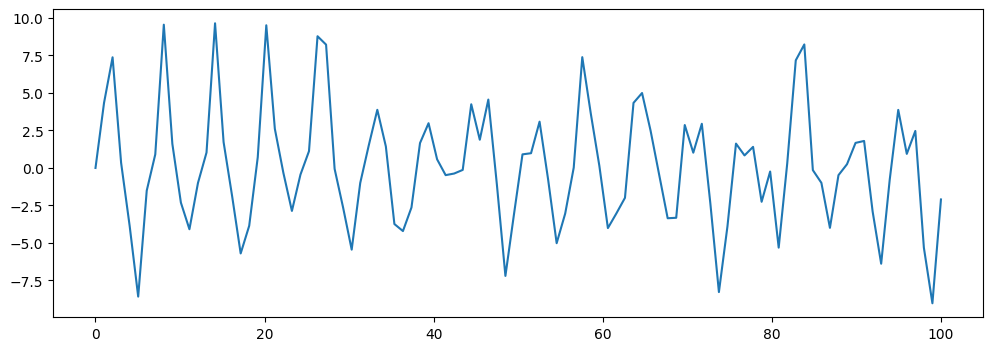

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve

x = np.linspace(0,100,100)
y = 10*np.sin(x)*np.random.rand(x.shape[0])
plt.figure(figsize=(12,4) )
plt.plot (x,y)


In [ ]:
#função para usar o matplotlib para imprimir os sinais de 1d como imagens
def show(valores,title):
  plt.figure(figsize=(len(valores),2))
  plt.imshow(valores[np.newaxis,:],cmap='gray')
  for k,s in enumerate(valores):
    plt.text(k,0,'{:.1f}'.format(s), fontsize=16,color='red',ha='center', va='center')
  plt.title(title,fontsize=18)
  plt.yticks([])

#1D

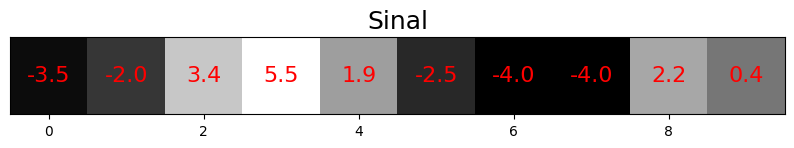

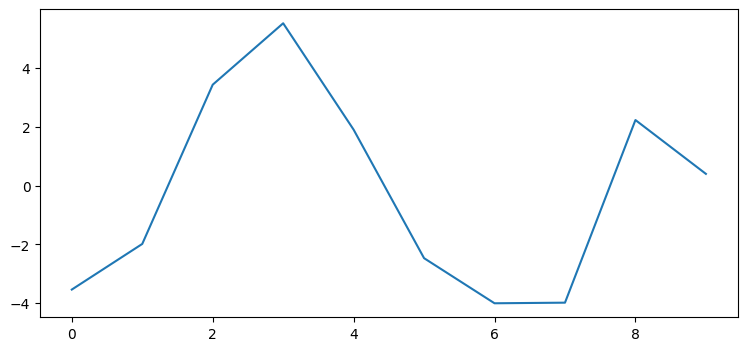

In [ ]:
sinal= y[5:15]

show(sinal, 'Sinal')

plt.figure(figsize=(9,4))
plt.plot(sinal)

# Kernel, o que é ?
- Filtro convolucional (Matriz de n-dimensional) que é operada com o dado através de uma convolução

- Convolução mede a semelhança entre os dois sinais
- Kernel que simule o padrão procurado : intervalos crescentes
- obs : a convolução opera as funções após inverter o kernel

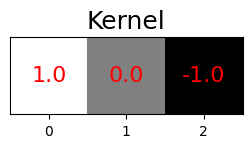

In [ ]:
kernel = np.asarray([1,0,-1])
show(kernel, 'Kernel')


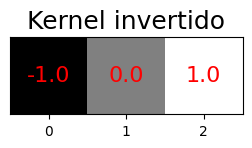

In [ ]:
#Kernel invertido
kernel_invertido= np.flip(kernel)
show(kernel_invertido,'Kernel invertido')


#kernel invertido

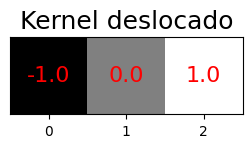

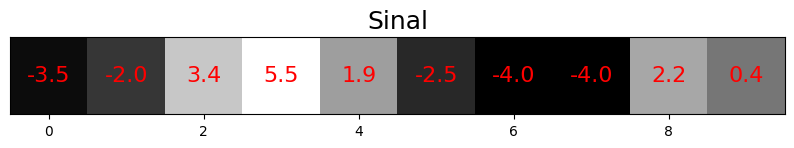

In [ ]:
u = 0
deslocamento = [float('nan')] * u
kernel_deslocado = np.hstack((deslocamento, kernel_invertido))
show(kernel_deslocado, 'Kernel deslocado')
show(sinal,'Sinal')
#convolução é produto de ponto a ponto(entre o kernel deslocado com sinal ) e depois a soma desses produtos e ao final irá gerar outra tabela com, pixels.
#sinal resultante dessa conta toda


#Ativação Final e sinal resultante


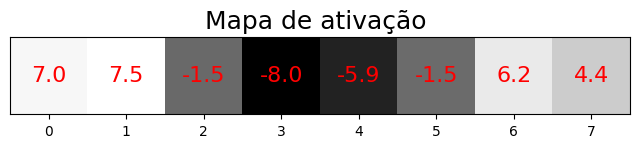

In [ ]:
ativacao = convolve(sinal,kernel, mode = 'valid')
show(ativacao, 'Mapa de ativação ')

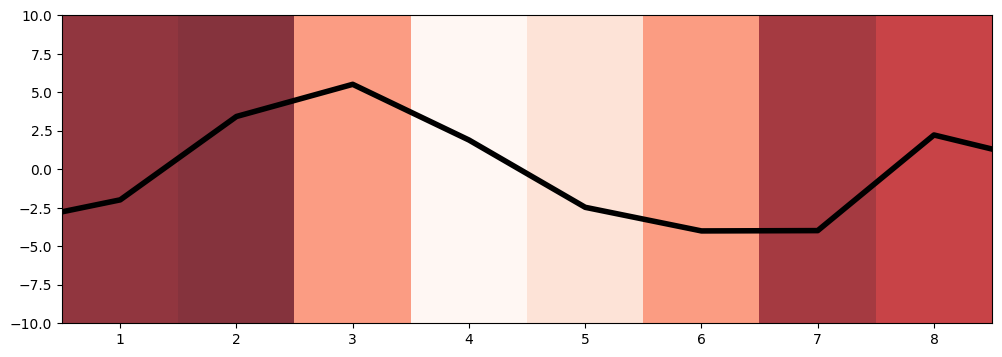

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(sinal, color='k',linewidth=4)
plt.imshow(ativacao[np.newaxis,:],cmap='Reds',aspect='auto',alpha=0.8,extent= (0.5,8.5,-10,10))

#Sinal completo
- observar os intervalos crescentes de acordo com o Kernel

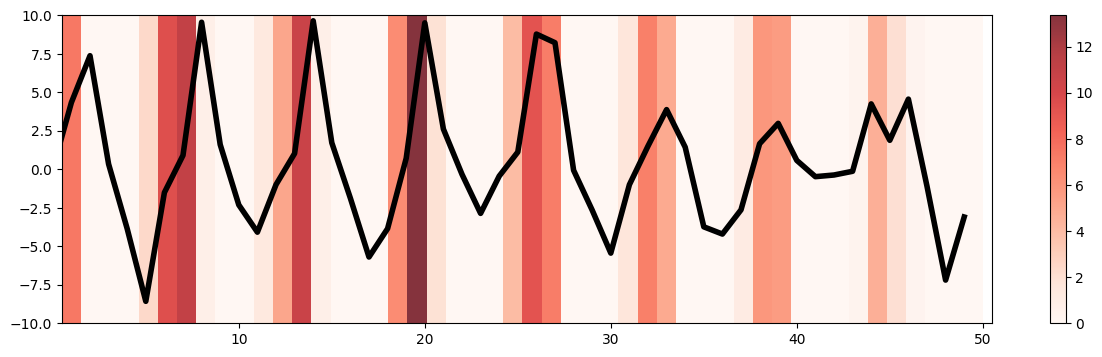

In [ ]:
ativacao= convolve(y[:50], kernel, mode='valid')
ativacao[ativacao<0]=0
plt.figure(figsize=(15,4))
plt.plot(y[:50], color='k', linewidth=4)
plt.imshow(ativacao[np.newaxis,:],cmap='Reds',aspect='auto',alpha=0.8,extent= (0.5,50,-10,10))
plt.xlim(0.5,50.5)
plt.colorbar()
